In [53]:
import numpy as np
from patchmatch import PatchMatch
import cv2
from helper_functions import *
import mahotas
from copy import deepcopy
from skimage import io, color

## Test image 1

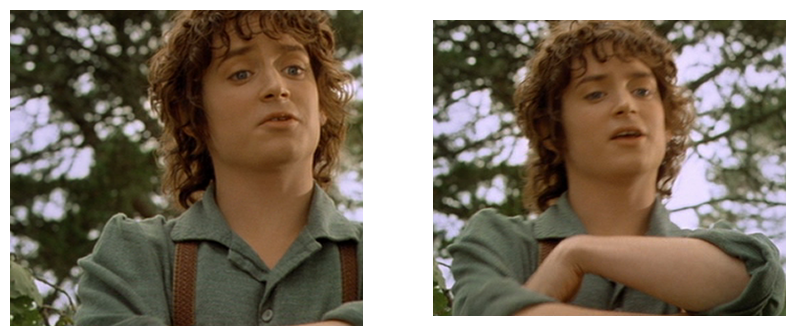

(358, 399, 3) (358, 426, 3)


In [11]:
a = read_image("../images/test1_a.png")
a_cpy = deepcopy(a)
b = read_image("../images/test1_b.png")
b_cpy = deepcopy(b)
a = mahotas.colors.rgb2lab(a)
b = mahotas.colors.rgb2lab(b)
plot_images([a_cpy,b_cpy], (1,2))
print(a.shape, b.shape)

In [12]:
pm = PatchMatch(5,3)
dist, loc = pm.run(a,b, True)

100%|██████████| 5/5 [01:38<00:00, 19.79s/it]


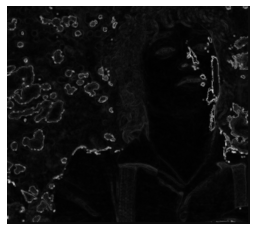

In [13]:
plt.imshow(dist, 'gray'); plt.axis("off"); plt.show()

(358, 399, 3)


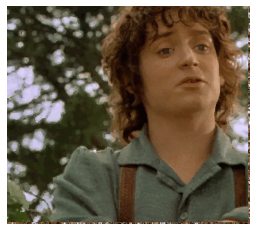

In [55]:
print(a.shape)
reconstructed_image = np.zeros(a_cpy.shape)
for i in range(loc.shape[0]):
    for j in range(loc.shape[1]):
        reconstructed_image[i,j,:] = b_cpy[loc[i,j,0],loc[i,j,1],:]
    reconstructed_image = reconstructed_image.astype(int)

plt.imshow(reconstructed_image); plt.axis("off"); plt.show()
io.imsave("../results/test1_reconstructed_image.png", reconstructed_image.astype(np.uint8))

## Test image 2

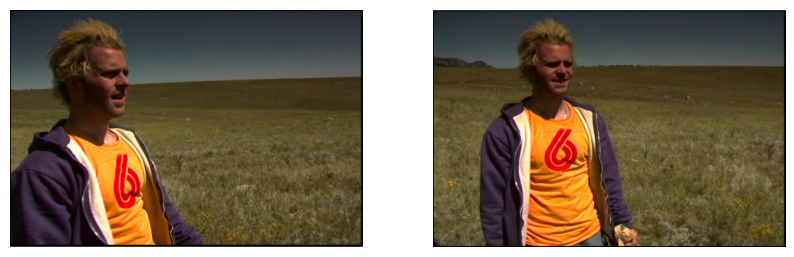

In [80]:
a = read_image("../images/test2_a.png")
b = read_image("../images/test2_b.png")
a_cpy = deepcopy(a[:,:,:3])
b_cpy = deepcopy(b[:,:,:3])
plot_images([a_cpy[:,:,:3],b_cpy[:,:,:3]], (1,2))
a = mahotas.colors.rgb2lab(a[:,:,:3])
b = mahotas.colors.rgb2lab(b[:,:,:3])

In [81]:
pm = PatchMatch(5,3)
dist, loc = pm.run(b,a, True)

100%|██████████| 5/5 [01:38<00:00, 19.76s/it]


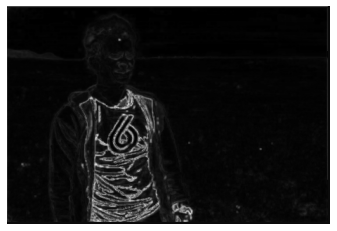

In [82]:
plt.imshow(dist, 'gray'); plt.axis("off"); plt.show()

(310, 460, 3)


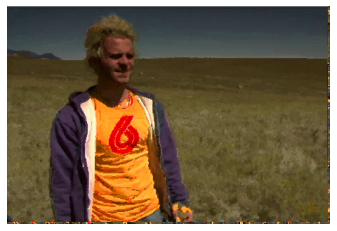

In [83]:
print(a.shape)

reconstructed_image = np.zeros(a_cpy.shape)
for i in range(loc.shape[0]):
    for j in range(loc.shape[1]):
        reconstructed_image[i,j,:] = a_cpy[loc[i,j,0],loc[i,j,1],:]
    reconstructed_image = reconstructed_image.astype(int)
    
plt.imshow(reconstructed_image); plt.axis("off"); plt.show()
io.imsave("../results/test2_reconstructed_image.png", reconstructed_image.astype(np.uint8))

## Test image 3

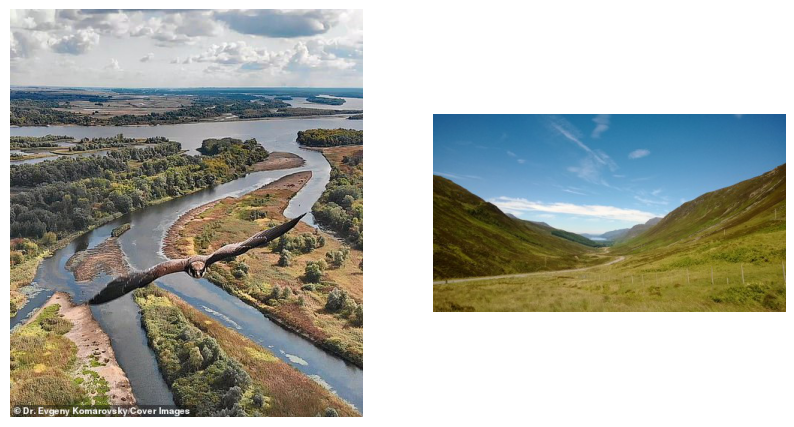

In [63]:
a = read_image("../images/test3_a.jpg")
b = read_image("../images/test3_b.jpg")
plot_images([a,b], (1,2))
a_cpy = deepcopy(a)
b_cpy = deepcopy(b)
a = mahotas.colors.rgb2lab(a)
b = mahotas.colors.rgb2lab(b)

In [64]:
pm = PatchMatch(5,3)
dist, loc = pm.run(b,a, True)

100%|██████████| 5/5 [01:29<00:00, 17.84s/it]


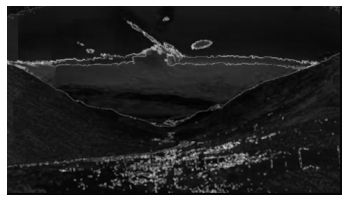

In [65]:
plt.imshow(dist, 'gray'); plt.axis("off"); plt.show()

(544, 470, 3)


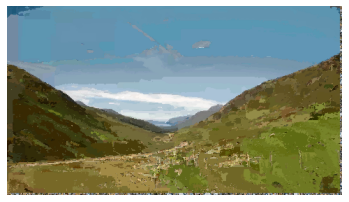

In [66]:
print(a.shape)
reconstructed_image = np.zeros(b.shape)
for i in range(b.shape[0]):
    for j in range(b.shape[1]):
        reconstructed_image[i,j,1] = a_cpy[loc[i,j,0],loc[i,j,1],1]
        reconstructed_image[i,j,2] = a_cpy[loc[i,j,0],loc[i,j,1],2]
        reconstructed_image[i,j,0] = a_cpy[loc[i,j,0],loc[i,j,1],0]
    reconstructed_image = reconstructed_image.astype(int)

plt.imshow(reconstructed_image); plt.axis("off"); plt.show()
io.imsave("../results/test3_reconstructed_image.png", reconstructed_image.astype(np.uint8))

## Tests on specific datasets
- Middlebury Stereo Vision dataset
- Images extracted from successive frames in a video
- Caltech -256
- Own images

### Middlebury stereo vision 

In [97]:
stereo_path = "../../separate-data/middlebury-stereo"

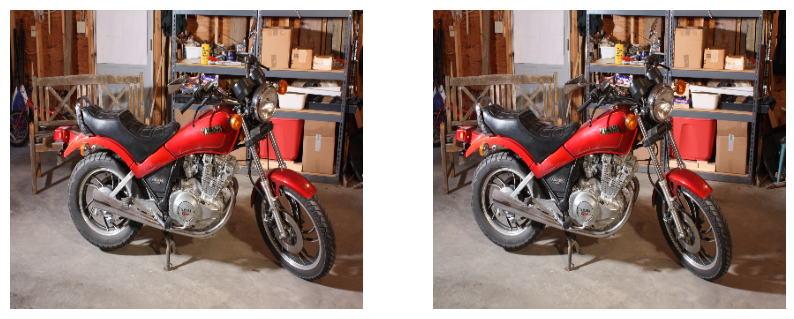

In [98]:
a = cv2.resize(read_image(os.path.join(stereo_path, "im0.png")),(400,340))
b = cv2.resize(read_image(os.path.join(stereo_path, "im1.png")),(400,340))
a_cpy = deepcopy(a[:,:,:3])
b_cpy = deepcopy(b[:,:,:3])
plot_images([a_cpy[:,:,:3],b_cpy[:,:,:3]], (1,2))
a = mahotas.colors.rgb2lab(a[:,:,:3])
b = mahotas.colors.rgb2lab(b[:,:,:3])

In [99]:
pm = PatchMatch(5,3)
dist, loc = pm.run(b,a, True)

100%|██████████| 5/5 [01:36<00:00, 19.22s/it]


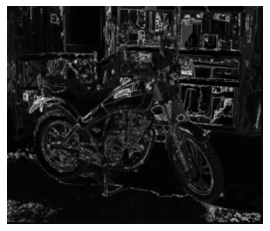

In [100]:
plt.imshow(dist, 'gray'); plt.axis("off"); plt.show()

(340, 400, 3)


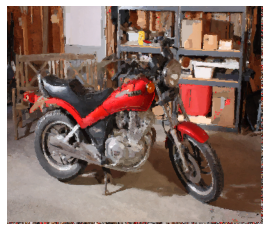

In [102]:
print(a.shape)
reconstructted_image = np.zeros(a.shape)
for i in range(loc.shape[0]):
    for j in range(loc.shape[1]):
        reconstructted_image[i,j,:] = a_cpy[loc[i,j,0],loc[i,j,1],:]
    reconstructted_image = reconstructted_image.astype(int)

plt.imshow(reconstructted_image); plt.axis("off"); plt.show()
io.imsave("../results/bike_reconstructed_image.png", reconstructted_image.astype(np.uint8))

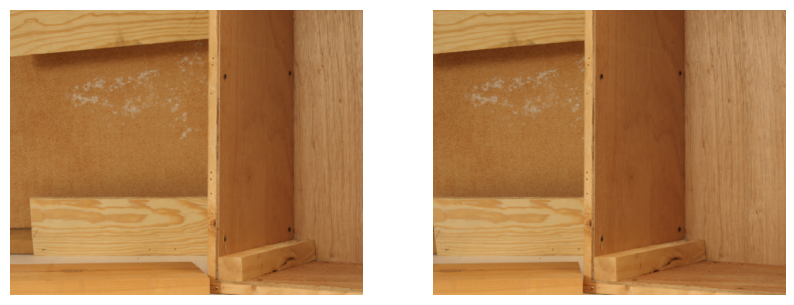

In [103]:
a = read_image(os.path.join(stereo_path, "view1.png"))
b = read_image(os.path.join(stereo_path, "view5.png"))
a_cpy = deepcopy(a[:,:,:3])
b_cpy = deepcopy(b[:,:,:3])
plot_images([a_cpy[:,:,:3],b_cpy[:,:,:3]], (1,2))
a = mahotas.colors.rgb2lab(a[:,:,:3])
b = mahotas.colors.rgb2lab(b[:,:,:3])

In [104]:
pm = PatchMatch(5,3)
dist, loc = pm.run(b,a, True)

100%|██████████| 5/5 [01:59<00:00, 23.93s/it]


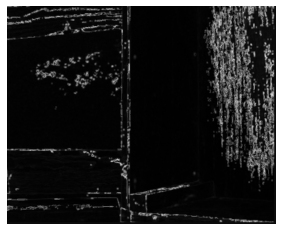

In [105]:
plt.imshow(dist, 'gray'); plt.axis("off"); plt.show()

(370, 457, 3)


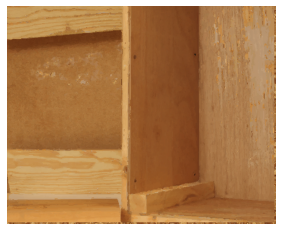

In [106]:
print(a.shape)
reconstructted_image = np.zeros(a.shape)
for i in range(loc.shape[0]):
    for j in range(loc.shape[1]):
        reconstructted_image[i,j,:] = a_cpy[loc[i,j,0],loc[i,j,1],:]
    reconstructted_image = reconstructted_image.astype(int)

plt.imshow(reconstructted_image); plt.axis("off"); plt.show()
io.imsave("../results/view_reconstructed_image.png", reconstructted_image.astype(np.uint8))

### Test on successive frames in a video

In [42]:
def get_frames_vid(inp_path, out_path, name_prefix = "frame_",num_images = 80):
    cap = cv2.VideoCapture(inp_path)
    ret, frame = cap.read()
    num_images_count = 0
    img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    plt.imsave(os.path.join(out_path, name_prefix + str(num_images_count) + ".png"), img)
    while(1):
        num_images_count = num_images_count + 1
        if num_images_count == num_images:
            break
        ret, frame2 = cap.read()
        if ret is False:
            break
        img_next = cv2.cvtColor(frame2, cv2.COLOR_BGR2RGB)
        plt.imsave(os.path.join(out_path, name_prefix + str(num_images_count)+".png"), img_next)

In [107]:
video_path = "../../separate-data/running.mp4"
frame_path = "../../separate-data/video-frames/"

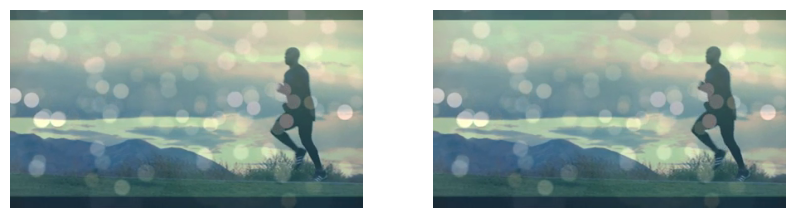

In [108]:
a = read_image(os.path.join(frame_path, "frame_76.png"))
b = read_image(os.path.join(frame_path, "frame_77.png"))
a_cpy = deepcopy(a[:,:,:3])
b_cpy = deepcopy(b[:,:,:3])
plot_images([a_cpy[:,:,:3],b_cpy[:,:,:3]], (1,2))
a = mahotas.colors.rgb2lab(a[:,:,:3])
b = mahotas.colors.rgb2lab(b[:,:,:3])

In [109]:
pm = PatchMatch(5,3)
dist, loc = pm.run(b,a, True)

100%|██████████| 5/5 [01:09<00:00, 13.93s/it]


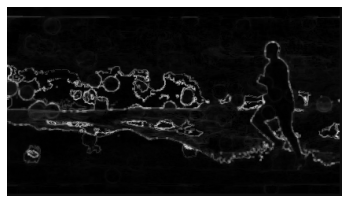

In [110]:
plt.imshow(dist, 'gray'); plt.axis("off"); plt.show()

(240, 426, 3)


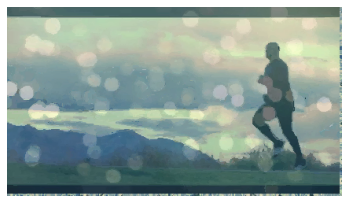

In [111]:
print(a.shape)
reconstructted_image = np.zeros(a.shape)
for i in range(loc.shape[0]):
    for j in range(loc.shape[1]):
        reconstructted_image[i,j,:] = a_cpy[loc[i,j,0],loc[i,j,1],:]
    reconstructted_image = reconstructted_image.astype(int)

plt.imshow(reconstructted_image); plt.axis("off"); plt.show()
io.imsave("../results/video_76_77_reconstructed_image.png", reconstructted_image.astype(np.uint8))

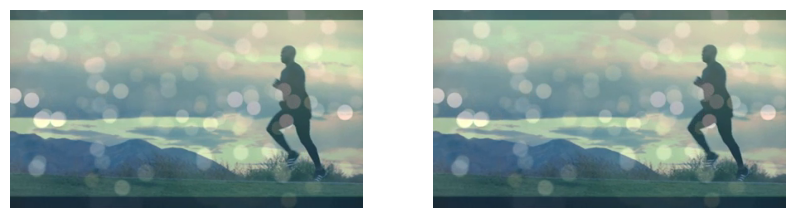

In [112]:
a = read_image(os.path.join(frame_path, "frame_78.png"))
b = read_image(os.path.join(frame_path, "frame_79.png"))
a_cpy = deepcopy(a[:,:,:3])
b_cpy = deepcopy(b[:,:,:3])
plot_images([a_cpy[:,:,:3],b_cpy[:,:,:3]], (1,2))
a = mahotas.colors.rgb2lab(a[:,:,:3])
b = mahotas.colors.rgb2lab(b[:,:,:3])

In [113]:
pm = PatchMatch(5,3)
dist, loc = pm.run(b,a, True)

100%|██████████| 5/5 [01:08<00:00, 13.72s/it]


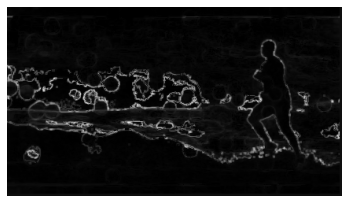

In [114]:
plt.imshow(dist, 'gray'); plt.axis("off"); plt.show()

(240, 426, 3)


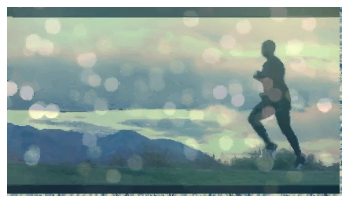

In [115]:
print(a.shape)
reconstructted_image = np.zeros(a.shape)
for i in range(loc.shape[0]):
    for j in range(loc.shape[1]):
        reconstructted_image[i,j,:] = a_cpy[loc[i,j,0],loc[i,j,1],:]
    reconstructted_image = reconstructted_image.astype(int)

plt.imshow(reconstructted_image); plt.axis("off"); plt.show()
io.imsave("../results/video_78_79_reconstructed_image.png", reconstructted_image.astype(np.uint8))

### Caltech-256

In [116]:
caltech_path = "../../separate-data/caltech-256"

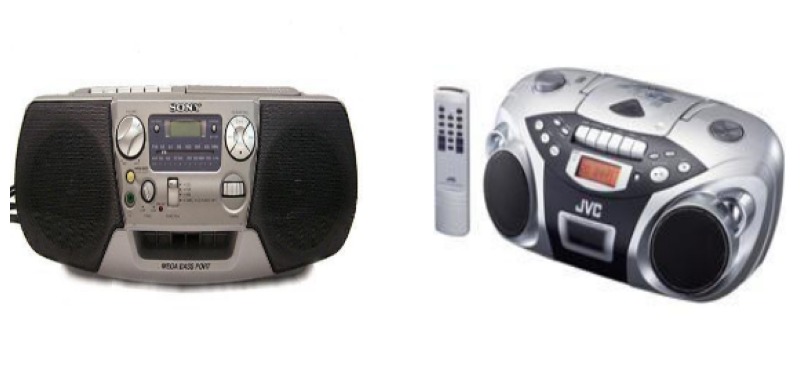

In [117]:
a = read_image(os.path.join(caltech_path, "boom1.jpg"))
b = read_image(os.path.join(caltech_path, "boom2.jpg"))
a = cv2.resize(a, (256, 256))
b = cv2.resize(b, (256, 256))
a_cpy = deepcopy(a[:,:,:3])
b_cpy = deepcopy(b[:,:,:3])
plot_images([a_cpy[:,:,:3],b_cpy[:,:,:3]], (1,2))
a = mahotas.colors.rgb2lab(a[:,:,:3])
b = mahotas.colors.rgb2lab(b[:,:,:3])

In [118]:
pm = PatchMatch(5,3)
dist, loc = pm.run(b,a, True)

100%|██████████| 5/5 [00:44<00:00,  8.92s/it]


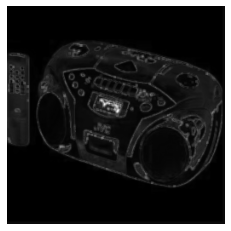

In [119]:
plt.imshow(dist, 'gray'); plt.axis("off"); plt.show()

(256, 256, 3)


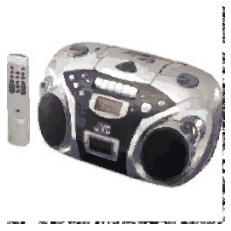

In [120]:
print(a.shape)
reconstructted_image = np.zeros(a.shape)
for i in range(loc.shape[0]):
    for j in range(loc.shape[1]):
        reconstructted_image[i,j,:] = a_cpy[loc[i,j,0],loc[i,j,1],:]
    reconstructted_image = reconstructted_image.astype(int)

plt.imshow(reconstructted_image); plt.axis("off"); plt.show()
io.imsave("../results/boom_reconstructed_image.png", reconstructted_image.astype(np.uint8))

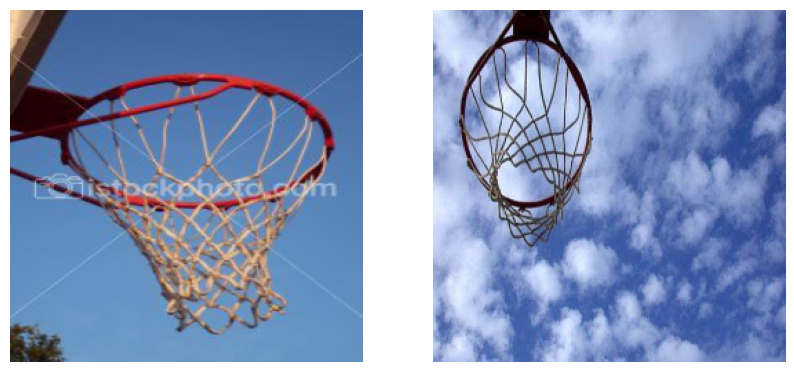

In [121]:
a = read_image(os.path.join(caltech_path, "hoop1.jpg"))
b = read_image(os.path.join(caltech_path, "hoop2.jpg"))
a = cv2.resize(a, (256, 256))
b = cv2.resize(b, (256, 256))
a_cpy = deepcopy(a[:,:,:3])
b_cpy = deepcopy(b[:,:,:3])
plot_images([a_cpy[:,:,:3],b_cpy[:,:,:3]], (1,2))
a = mahotas.colors.rgb2lab(a[:,:,:3])
b = mahotas.colors.rgb2lab(b[:,:,:3])

In [122]:
pm = PatchMatch(5,3)
dist, loc = pm.run(b,a, True)

100%|██████████| 5/5 [00:44<00:00,  8.99s/it]


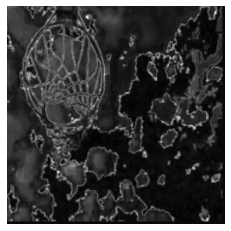

In [123]:
plt.imshow(dist, 'gray'); plt.axis("off"); plt.show()

(256, 256, 3)


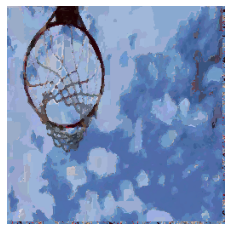

In [124]:
print(a.shape)
reconstructted_image = np.zeros(a.shape)
for i in range(loc.shape[0]):
    for j in range(loc.shape[1]):
        reconstructted_image[i,j,:] = a_cpy[loc[i,j,0],loc[i,j,1],:]
    reconstructted_image = reconstructted_image.astype(int)

plt.imshow(reconstructted_image); plt.axis("off"); plt.show()
io.imsave("../results/hoop_reconstructed_image.png", reconstructted_image.astype(np.uint8))

### Own images

In [125]:
ajay_path = "../../separate-data/ajay-images/"

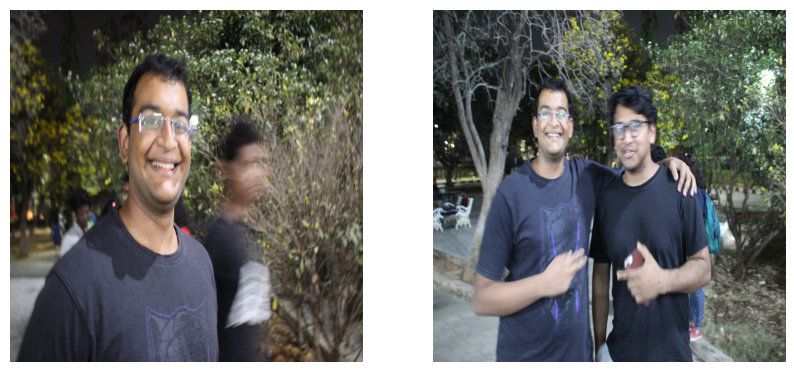

In [126]:
a = read_image(os.path.join(ajay_path, "ajay1.JPG"))
b = read_image(os.path.join(ajay_path, "ajay2.JPG"))
a = cv2.resize(a, (1000, 1000))
b = cv2.resize(b, (1000, 1000))
a_cpy = deepcopy(a[:,:,:3])
b_cpy = deepcopy(b[:,:,:3])
plot_images([a_cpy[:,:,:3],b_cpy[:,:,:3]], (1,2))
a = mahotas.colors.rgb2lab(a[:,:,:3])
b = mahotas.colors.rgb2lab(b[:,:,:3])

In [127]:
pm = PatchMatch(5,3)
dist, loc = pm.run(b,a, True)

100%|██████████| 5/5 [11:50<00:00, 142.19s/it]


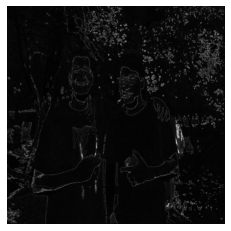

In [128]:
plt.imshow(dist, 'gray'); plt.axis("off"); plt.show()

(1000, 1000, 3)


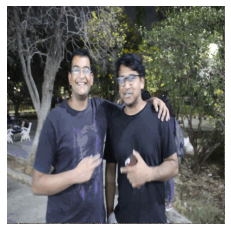

In [129]:
print(a.shape)
reconstructted_image = np.zeros(a.shape)
for i in range(loc.shape[0]):
    for j in range(loc.shape[1]):
        reconstructted_image[i,j,:] = a_cpy[loc[i,j,0],loc[i,j,1],:]
    reconstructted_image = reconstructted_image.astype(int)

plt.imshow(reconstructted_image); plt.axis("off"); plt.show()
io.imsave("../results/ajay_reconstructed_image.png", reconstructted_image.astype(np.uint8))